# Лаба 3
## Метод Рунге - Кутты

In [287]:
def f(t, y):
    return 2 * t * y

In [288]:
def Runge_Kutt4(t, y, h, count):
    k = [0] * 4
    for i in range(count):
        k[0] = f(t[i], y[i])
        k[1] = f(t[i] + h / 2, y[i] + h * k[0] / 2)
        k[2] = f(t[i] + h / 2, y[i] + h * k[1] / 2)
        k[3] = f(t[i] + h, y[i] + h * k[2])
        kn = (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
        y[i + 1] = y[i] + h * kn
    return y

In [328]:
t_max = 1
t_min = 0
h1 = 0.1
h2 = 0.05
h3 = 0.025
print(h1, h2, h3)

0.1 0.05 0.025


In [329]:
count1 = t_max / h1
count1 = int(count1)
count2 = t_max / h2
count2 = int(count2)
count3 = t_max / h3
count3 = int(count3)
y1 = [1] + [0] * count1
y2 = [1] + [0] * count2
y3 = [1] + [0] * count3
t1 = [i / count1 for i in range(count1 + 1)]
t2 = [i / count2 for i in range(count2 + 1)]
t3 = [i / count3 for i in range(count3 + 1)]

In [330]:
print(t1, t2, t3, sep="\n\n")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

[0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]


In [331]:
# решения для 3 сеток
y1 = Runge_Kutt4(t1, y1, h1, count1)
y2 = Runge_Kutt4(t2, y2, h2, count2)
y3 = Runge_Kutt4(t3, y3, h3, count3)

In [332]:
import numpy as np
# истинные значения для каждой сетки (e ^ t ^ 2)
a1 = [np.e ** ((i / count1) ** 2) for i in range(count1 + 1)]
a2 = [np.e ** ((i / count2) ** 2) for i in range(count2 + 1)]
a3 = [np.e ** ((i / count3) ** 2) for i in range(count3 + 1)]

In [333]:
# абсолютная погрешность между практическим и теоретическим для каждой сетки
b1 = list(abs(np.array(y1) - np.array(a1)))
b2 = list(abs(np.array(y2) - np.array(a2)))
b3 = list(abs(np.array(y3) - np.array(a3)))

In [334]:
from matplotlib import pyplot as plt
%matplotlib inline

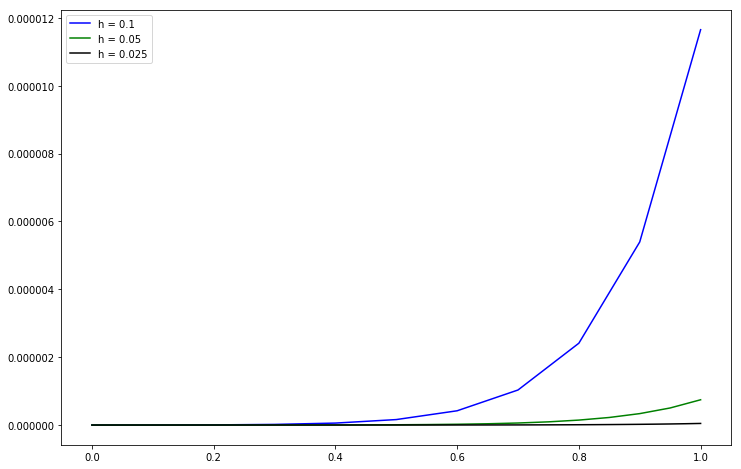

In [375]:
plt.subplots(figsize=(12, 8))
plt.plot(t1, b1, label='h = 0.1', color='blue')
plt.plot(t2, b2, label='h = 0.05', color='green')
plt.plot(t3, b3, label='h = 0.025', color='black')
plt.legend()

In [336]:
print(b1[count1], b2[count2], b3[count3], sep='\n')

1.1653075508988309e-05
7.447471728205812e-07
4.6923418040023535e-08


In [337]:
print(b1[count1] / b2[count2], b2[count2] / b3[count3], sep='\n')

15.647022149617046
15.87154567864911


### Дополнительно - сетка с шагом 0.2

In [352]:
h4 = 0.2
count4 = t_max / h4
count4 = int(count4)
y4 = [1] + [0] * count4
t4 = [i / count4 for i in range(count4 + 1)]

In [353]:
y4 = Runge_Kutt4(t4, y4, h4, count4)

In [354]:
b4 = list(abs(np.array(y4) - np.array([np.e ** (t4[i] ** 2) for i in range(count4 + 1)])))

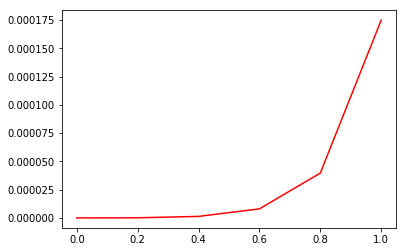

In [355]:
plt.plot(t4, b4, color='red')

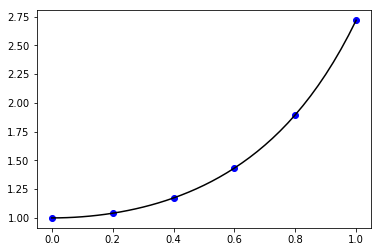

In [356]:
plt.plot(t4, y4, 'bo')
plt.plot(t3, a3, color='k')